In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier



In [2]:
df = pd.read_csv("/content/combined dataset.csv")

In [3]:
df['SepsisLabel'] = (
    (df['Temp'] > 38) | (df['Temp'] < 36) |
    (df['HR'] > 90) |
    (df['Resp'] > 20) |
    (df['WBC'] > 12) | (df['WBC'] < 4) |
    (df['SBP'] < 90) |
    (df['Lactate'] > 2.2)
).astype(int)


In [4]:
features = ['HR', 'O2Sat', 'Temp', 'WBC', 'SBP', 'Lactate', 'DBP', 'Creatinine', 'Resp']
target = 'SepsisLabel'

In [5]:
df.fillna(df.median(), inplace=True)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
y_pred = xgb_model.predict(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


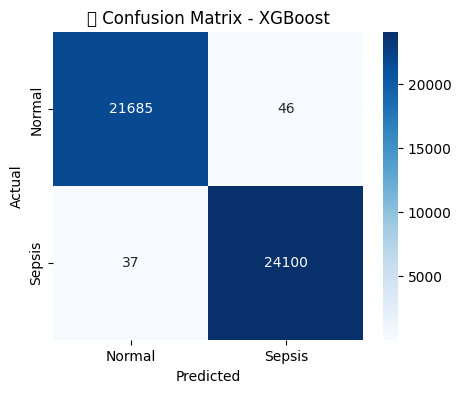

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Sepsis"], yticklabels=["Normal", "Sepsis"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("📊 Confusion Matrix - XGBoost")
plt.show()

In [27]:
print("\n🔍 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Normal", "Sepsis"]))


🔍 Classification Report:

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     21731
      Sepsis       1.00      1.00      1.00     24137

    accuracy                           1.00     45868
   macro avg       1.00      1.00      1.00     45868
weighted avg       1.00      1.00      1.00     45868



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [ ]:
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values = [accuracy, precision, recall, f1]
plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette="viridis")
plt.ylim(0, 1)
plt.title("📊 XGBoost Model Performance")
plt.ylabel("Score")
plt.show()
print(f"✅ Model Accuracy: {accuracy*100:.2f}%")
print(f"🔍 Precision: {precision:.4f}")
print(f"📉 Recall: {recall:.4f}")
print(f"📈 F1-Score: {f1:.4f}")
print(f"📉 Mean Squared Error (MSE): {mse:.4f}")

In [30]:
def predict_sepsis():
    print("\n🔬 Sepsis Risk Detector")
    print("Enter patient details one by one:")

    input_data = {}
    for feature in features:
        value = float(input(f"{feature}: "))
        input_data[feature] = value

    input_df = pd.DataFrame([input_data])
    input_scaled = scaler.transform(input_df)

    # ✅ Predict Sepsis
    prediction = xgb_model.predict(input_scaled)

    if prediction[0] == 1:
        print("\n🚨 Sepsis Risk Detected! Immediate medical attention recommended.")
    else:
        print("\n✅ Patient is Normal. No Sepsis Risk Detected.")

In [ ]:
if __name__ == "__main__":
    predict_sepsis()


🔬 Sepsis Risk Detector
Enter patient details one by one:


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


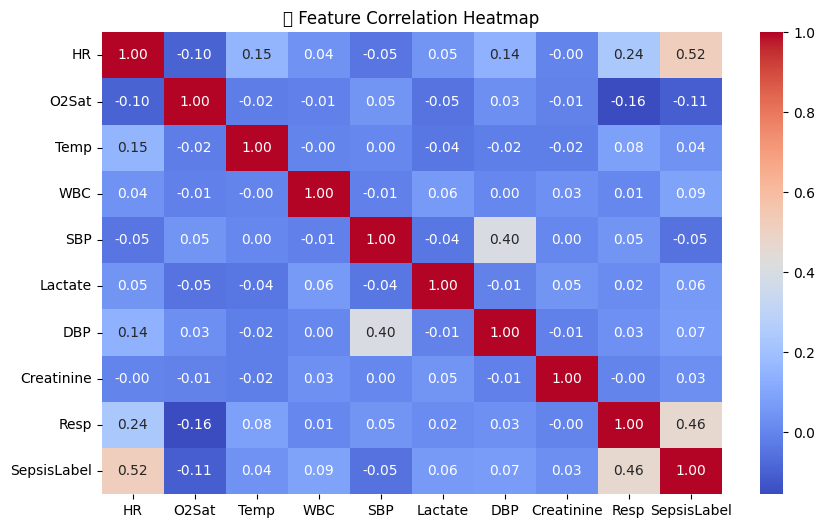

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[features + ['SepsisLabel']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("📊 Feature Correlation Heatmap")
plt.show()

<ipython-input-16-f71a9f21ddb0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["SepsisLabel"], palette=["green", "red"])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


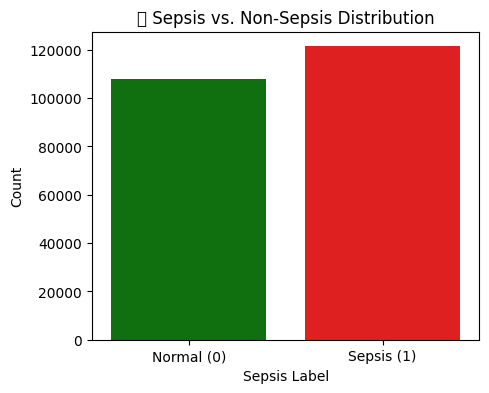

In [16]:
plt.figure(figsize=(5, 4))
sns.countplot(x=df["SepsisLabel"], palette=["green", "red"])
plt.xticks([0, 1], ["Normal (0)", "Sepsis (1)"])
plt.title("🔍 Sepsis vs. Non-Sepsis Distribution")
plt.xlabel("Sepsis Label")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


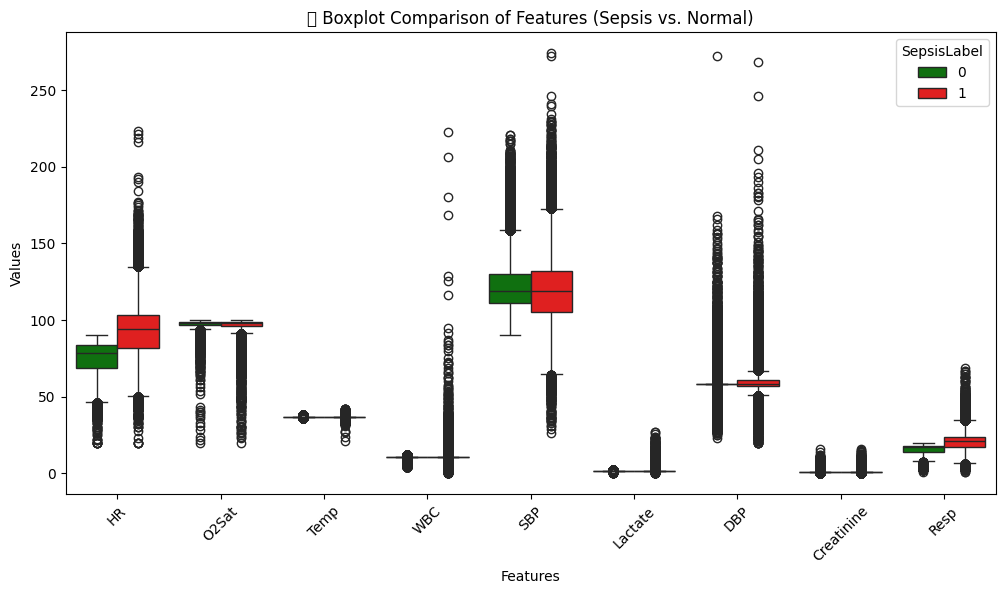

In [17]:
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars=["SepsisLabel"], value_vars=features)
sns.boxplot(x="variable", y="value", hue="SepsisLabel", data=df_melted, palette=["green", "red"])
plt.xticks(rotation=45)
plt.title("📦 Boxplot Comparison of Features (Sepsis vs. Normal)")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

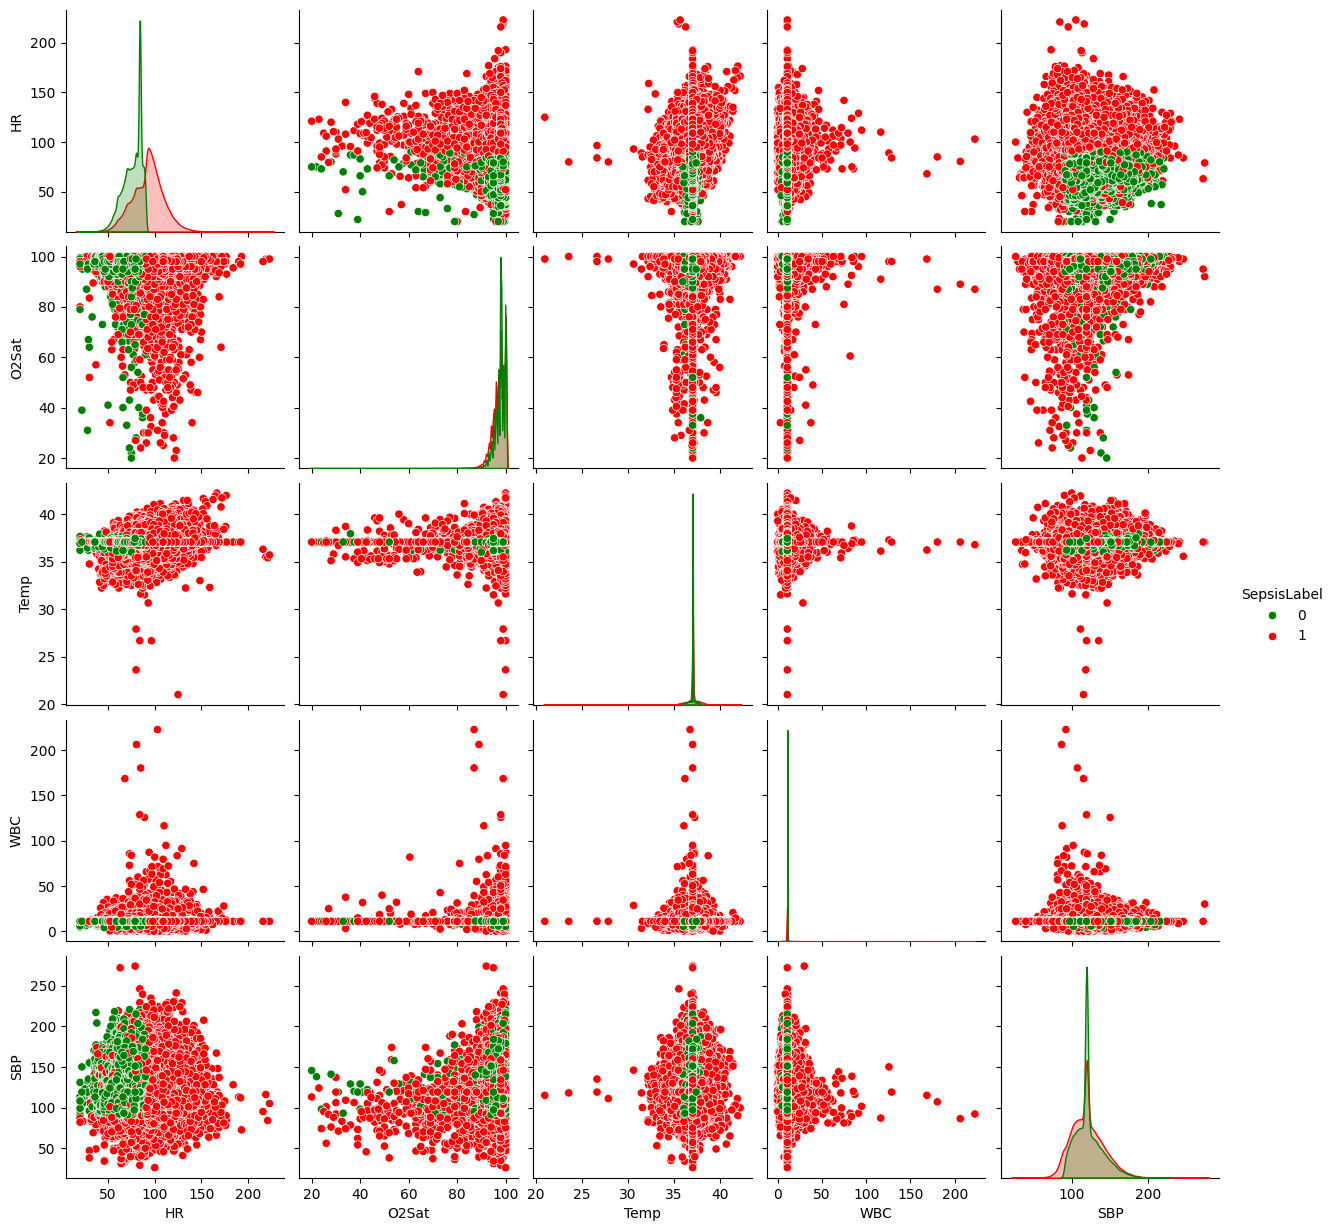

In [18]:
sns.pairplot(df, hue="SepsisLabel", palette=["green", "red"], diag_kind="kde", vars=features[:5])
plt.show()

In [21]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

NameError: name 'y_test' is not defined